In [9]:
# Treinando e visualizando uma arvore de decisao
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # comprimento e largura da petala
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [10]:
# visualizando a arvore
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)





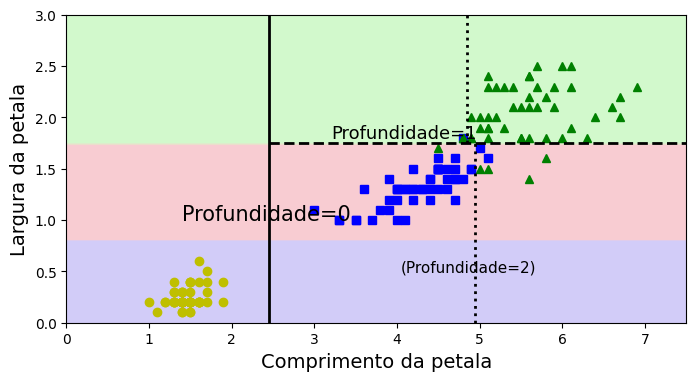

In [12]:
# Fazendo predicoes
# Equaçaõ de gini para calcular a impureza de um no
# gini = 1 - (p0)^2 - (p1)^2 - (p2)^2
# p0, p1 e p2 sao as proporcoes de cada classe no nó em questao (ex: 0.2, 0.5, 0.3)

# A funcao de custo do algoritmo CART é a seguinte:
# J(k, t_k) = m_esq / m * g_esq + m_dir / m * g_dir
# onde:
# k é o indice do atributo
# t_k é o valor de corte do atributo k
# m_esq e m_dir sao o numero de instancias no no esquerdo e direito, respectivamente
# g_esq e g_dir sao as impurezas dos nos esquerdo e direito, respectivamente

# O algoritmo CART é um algoritmo guloso, ou seja, ele busca a melhor solucao no momento atual
# sem se preocupar com o futuro. Ele nao garante a melhor solucao global, mas geralmente funciona bem na pratica.

# grafico de fronteiras de decisao da arvore de decisao
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # gerando os pontos para predizer
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    # criando uma matriz de pontos
    x1, x2 = np.meshgrid(x1s, x2s)

    # predizendo os pontos
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # plotando as fronteiras de decisao
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)

    # plotando os dados de treinamento
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    # plotando a legenda
    if iris:
        plt.xlabel("Comprimento da petala", fontsize=14)
        plt.ylabel("Largura da petala", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidade=0", fontsize=15)
plt.text(3.2, 1.80, "Profundidade=1", fontsize=13)
plt.text(4.05, 0.5, "(Profundidade=2)", fontsize=11)

plt.show()